# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
# desde la consola:
! pip install tweepy
! pip install python-dotenv
! pip install pandas
! pip install matplotlib
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 152.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 135.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 131.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 155.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 167.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 kB 166.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 191.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 49.9 MB/s eta 0:00:0000:0100:01


In [8]:
# librerias
import os
from dotenv import load_dotenv
import tweepy
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# cargo .env
load_dotenv()

# cargo datos de acceso desde archivo .env
consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
access_token = os.environ.get('ACCESS_TOKEN')
access_token_secret = os.environ.get('ACCESS_TOKEN_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')

In [4]:
# función para conectarse a Twitter
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

In [10]:
# defino query
query = '#100daysofcode (pandas OR python) -is:retweet'

# traigo 100 tweets más recientes
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)


In [12]:
# creo diccionario
tweets_dict = tweets.json()

# axtraigo "data" del diccionario
tweets_data = tweets_dict['data'] 

# creo data frame usando pandas
df = pd.json_normalize(tweets_data)
df.head()

,text,lang,id,created_at,author_id
0,"HEY DEV, TAKE THIS SURVEY &amp; WIN A MACBOOK\...",en,1541506289850847232,2022-06-27T19:38:33.000Z,822467311361818625
1,Grade A+ assured in any timed paper\n#Fall sem...,en,1541506190378762240,2022-06-27T19:38:10.000Z,909688467541684224
2,Speed up #Pandas in #Python with Modin. #BigDa...,en,1541506166139850755,2022-06-27T19:38:04.000Z,4263007693
3,"HEY DEV, TAKE THIS SURVEY &amp; WIN A MACBOOK\...",en,1541506162885017604,2022-06-27T19:38:03.000Z,822467311361818625
4,How Much Math Do I Need in Data #Science? #Big...,en,1541506160833986561,2022-06-27T19:38:03.000Z,4263007693


In [13]:
# guardo data frame en csv
df.to_csv("coding-tweets.csv")

In [14]:
# funcion para saber si un texto está dentro de un tweet
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [15]:
### busco cuantas veces figura las palabras "pandas" y "python" en los tweets

# inicializo lista
[pandas, python] = [0, 0]

# itero filas del df
for index, row in df.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

In [21]:
# imprimo resultados
print(f'la palabra pandas aparece en {pandas} tweets mientras que python aparece en {python} tweets')


la palabra pandas aparece en 2 tweets mientras que python aparece en 100 tweets


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


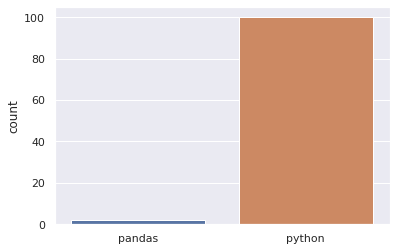

In [16]:
# grafico resultados

# estilo de colores en seaborn
sns.set(color_codes = True)

# etiquetas
cd = ['pandas', 'python']

# gráfico de barras
ax = sns.barplot(x = cd, y = [pandas, python])
ax.set(ylabel="count")
plt.show()